In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Dropout
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error

In [ ]:
data = pd.read_csv("/content/Tesla_Nasdaq_Prediction.csv")
data = data.iloc[:,0:6]
y = data.loc[:,['Close/Last','Date']]
y = data.iloc[:,0:2]
data = data.drop(['Close/Last'],axis='columns')
print(data.head(5))
print(y.head(5))

       Date    Volume     Open     High      Low
0  4/8/2022  18337900  1043.21  1048.44  1022.44
1  4/7/2022  26482350  1052.39  1076.59  1021.54
2  4/6/2022  29782850  1073.47  1079.00  1027.70
3  4/5/2022  26691670  1136.30  1152.87  1087.30
4  4/4/2022  27392570  1089.38  1149.91  1072.53
       Date  Close/Last
0  4/8/2022     1025.49
1  4/7/2022     1057.26
2  4/6/2022     1045.76
3  4/5/2022     1091.26
4  4/4/2022     1145.45


In [ ]:
y = y.set_index('Date')
y.index = pd.to_datetime(y.index,unit='ns')
print(y.index)

DatetimeIndex(['2022-04-08', '2022-04-07', '2022-04-06', '2022-04-05',
               '2022-04-04', '2022-04-01', '2022-03-31', '2022-03-30',
               '2022-03-29', '2022-03-28',
               ...
               '2012-04-24', '2012-04-23', '2012-04-20', '2012-04-19',
               '2012-04-18', '2012-04-17', '2012-04-16', '2012-04-13',
               '2012-04-12', '2012-04-11'],
              dtype='datetime64[ns]', name='Date', length=2517, freq=None)


In [ ]:
data = data.set_index('Date')
data.index = pd.to_datetime(data.index,unit='ns')
print(data.index)

DatetimeIndex(['2022-04-08', '2022-04-07', '2022-04-06', '2022-04-05',
               '2022-04-04', '2022-04-01', '2022-03-31', '2022-03-30',
               '2022-03-29', '2022-03-28',
               ...
               '2012-04-24', '2012-04-23', '2012-04-20', '2012-04-19',
               '2012-04-18', '2012-04-17', '2012-04-16', '2012-04-13',
               '2012-04-12', '2012-04-11'],
              dtype='datetime64[ns]', name='Date', length=2517, freq=None)


In [ ]:
import sklearn
from sklearn.model_selection import train_test_split

X_train = data[400:]
X_test = data[:400]

y_train = y[400:]
y_test = y[:400]

In [ ]:
aim = ['Close/Last']

In [ ]:
def line_plot(line1, line2, label1=None, label2=None, title='', lw=2):
    fig, ax = plt.subplots(1, figsize=(13, 7))
    ax.plot(line1, label=label1, linewidth=lw)
    ax.plot(line2, label=label2, linewidth=lw)
    ax.set_ylabel('TESLA/USD', fontsize=14)
    ax.set_title(title, fontsize=16)
    ax.legend(loc='best', fontsize=16);

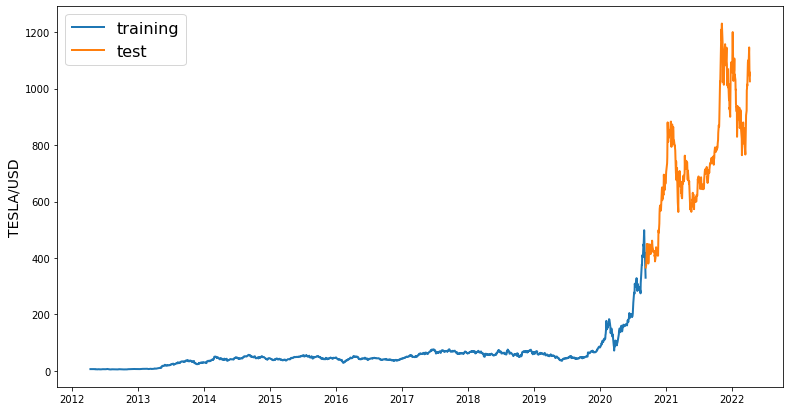

In [ ]:
line_plot(y_train[aim], y_test[aim], 'training', 'test', title='')

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()